In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv('datasets/antropometria-dataset.csv')

df.head()


,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [2]:
df.fillna(method ='ffill', inplace = True) 
peso = df['peso']
cintura = df['cintura']

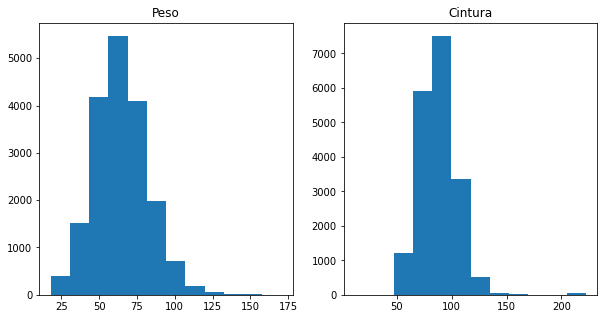

In [3]:
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.hist(x = peso, bins = 12)
plt.title("Peso")

plt.subplot(1,2,2)
plt.hist(x = cintura, bins = 12)
plt.title("Cintura")

plt.show()


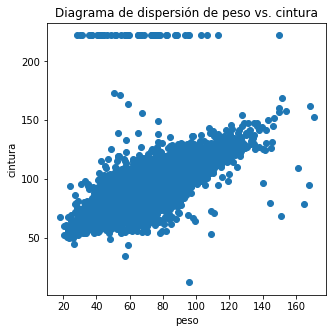

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(x = peso, y = cintura)
plt.xlabel("peso")
plt.ylabel("cintura")
plt.title("Diagrama de dispersión de peso vs. cintura")

plt.show()

¿Cómo son cada una de las distribuciones (simétrica, asimétrica, sesgada a la izquierda, segada a la derecha)?
Peso: asimétrica sesgada a la izquierda
Cintura: asimétrica sesgada a la izquierda

Al visualizar los histogramas ¿existen valores atípicos?
Al ver el histrograma de peso se puede ver que si hay algunos datos alejados de la media, aquellos en 150, por lo que se pueden considerar datos atípicos, aunque no hay mucho espacio entre los datos. 
En el histograma de cintura se puede identificar fácilmente datos atípicos, los cuales son los que se encuentran después del 200, pues hay mucho espacio entre esos datos. 

¿Cómo es el comportamiento del peso con respecto a la cintura?
En el diagrama de disperción se puede ver el comportamiento del peso respecto a la cintura y se puede notar que hay una correlación positiva pero no muy fuerte. 

Al visualizar el diagrama de dispersión entre la variables 'peso' y 'cintura' ¿existen valores atípicos?
Se puede notar que existen varios valores atípicos que se alejan mucho de la media y de la recta de ajuste, que se ven más alejados del resto de los datos. 

In [5]:
just_hombres=((df['sexo']==1))


In [7]:

hombres= df[just_hombres] 
hombres

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.400,2,146.50,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
5,241555,3,24,SAN LUIS POTOSI,1,10,7,31.900,1,141.45,...,20:12,1,20:19,1,M2435,5,3,1,588.463281,245
9,31220,3,3,BAJA CALIFORNIA SUR,1,10,10,48.025,1,147.05,...,17:09,2,17:09,1,M0331,5,3,1,138.063636,35
17,320763,4,32,ZACATECAS,1,11,3,31.500,1,140.65,...,12:40,1,12:55,1,M3220,3,2,1,1285.844656,323
21,261348,5,26,SONORA,1,11,7,59.850,2,146.50,...,7:00,2,7:10,1,M2632,2,1,2,737.343409,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18626,171455,1,17,MORELOS,1,71,1,77.350,2,171.30,...,8:20,1,8:30,1,M1732,2,1,2,627.566400,172
18627,300843,1,30,VERACRUZ DE IGNACIO DE LA LLAVE,1,79,3,68.600,1,150.20,...,15:40,3,16:15,1,M3020,5,3,1,6385.849606,305
18630,210187,1,21,PUEBLA,1,84,8,57.050,2,156.20,...,21:00,3,21:05,1,M2105,3,2,1,1133.871396,213
18634,10315,2,1,AGUASCALIENTES,1,29,0,118.850,2,168.80,...,18:13,1,18:28,1,M0109,5,3,1,1188.823820,15


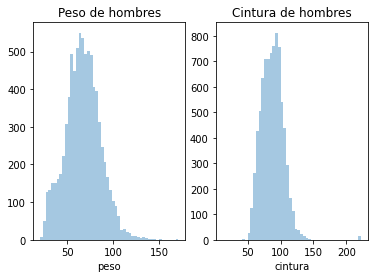

In [8]:


plt.subplot(1,2,1)
sns.distplot(hombres['peso'], kde = False).set_title("Peso de hombres")

plt.subplot(1,2,2)
sns.distplot(hombres['cintura'], kde = False).set_title("Cintura de hombres")
plt.show()

In [17]:
sns.scatterplot(x=(hombres['peso'])),y=(hombres['cintura']).set_title("Peso de hombres")

SyntaxError: can't assign to function call (<ipython-input-17-47bc5c9b05ae>, line 1)

In [11]:
just_mujeres=((df['sexo']==2))

In [12]:
mujeres= df[just_mujeres] 
mujeres

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.40,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.10,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.00,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.00,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
6,211879,2,21,PUEBLA,2,10,9,31.95,2,134.95,...,22:22,2,15:11,1,M2144,1,1,1,1879.750532,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18633,160939,1,16,MICHOACAN DE OCAMPO,2,58,5,75.40,2,152.50,...,16:00,1,16:15,1,M1627,3,2,1,2297.639408,163
18635,300116,2,30,VERACRUZ DE IGNACIO DE LA LLAVE,2,73,11,75.80,1,141.15,...,18:00,1,18:05,1,R3002,5,3,1,7615.607749,305
18636,40253,1,4,CAMPECHE,2,75,0,69.40,1,144.80,...,18:40,1,18:40,1,M0408,5,3,1,195.314670,45
18638,250801,1,25,SINALOA,2,72,7,59.05,2,142.50,...,6:02,3,6:02,1,M2512,3,2,1,2354.581350,253


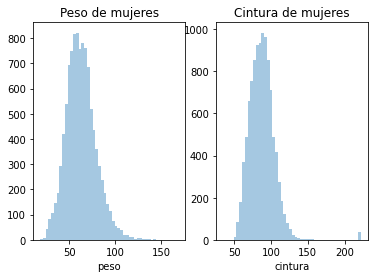

In [13]:


plt.subplot(1,2,1)
sns.distplot(mujeres['peso'], kde = False).set_title("Peso de mujeres")

plt.subplot(1,2,2)
sns.distplot(mujeres['cintura'], kde = False).set_title("Cintura de mujeres")
plt.show()